In [2]:
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.csv')
df.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']

In [3]:
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [15]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [5]:
data = df.drop(['Sample code'],axis=1)
predictors = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bland Chromatin','Normal Nucleoli','Mitoses']

features = df[predictors]
target=df.Class

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

cancer=LogisticRegression() 
cancer.fit(X_train,y_train) #fitting the model
prediction = cancer.predict(X_test)

In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,prediction)
print("Accuracy:",round(metrics.accuracy_score(y_test,prediction),2))

Accuracy: 0.96


In [12]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       108
           4       0.94      0.96      0.95        67

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175



In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [23]:
y_train.value_counts()

2    349
4    174
Name: Class, dtype: int64

In [24]:
y_train_res.value_counts()

2    349
4    349
Name: Class, dtype: int64

In [27]:
cancer.fit(X_train_res, y_train_res) #fitting the model
pred2 = cancer.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test,pred2)
print("Accuracy:",round(metrics.accuracy_score(y_test,pred2),2))

Accuracy: 0.97


In [28]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,pred2))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       108
           4       0.93      0.99      0.96        67

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



In [34]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred3 = knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       108
           4       0.94      0.94      0.94        67

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_res, y_train_res)
pred4 = knn.predict(X_test)

In [39]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       108
           4       0.93      0.97      0.95        67

    accuracy                           0.96       175
   macro avg       0.95      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175



<AxesSubplot: >

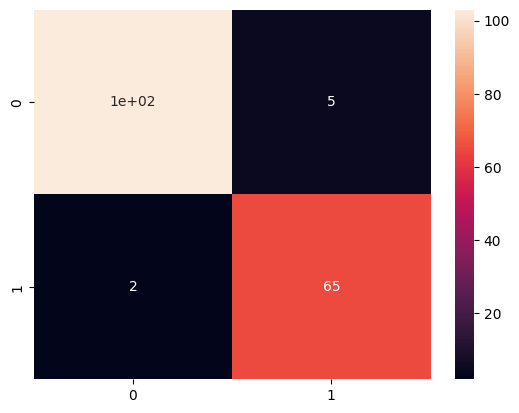

In [42]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred4),annot = True)

<AxesSubplot: >

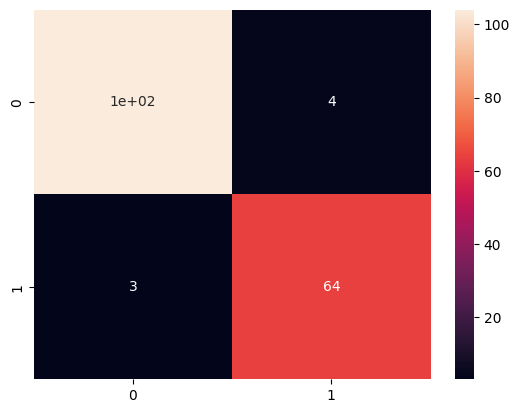

In [45]:
sns.heatmap(confusion_matrix(y_test,prediction),annot = True)

<AxesSubplot: >

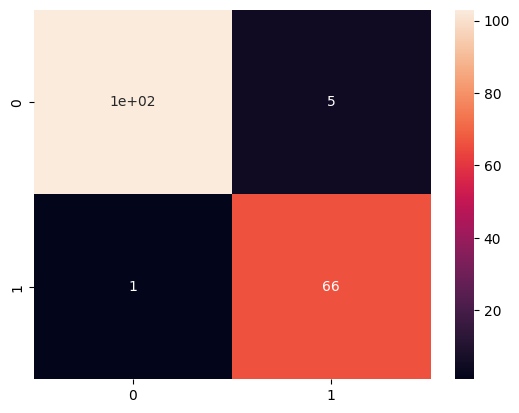

In [46]:
sns.heatmap(confusion_matrix(y_test,pred2),annot = True)

In [48]:
print(confusion_matrix(y_test,pred2))

[[103   5]
 [  1  66]]
